In [31]:
import time
from math import sin  
start = time.time()

In [32]:
def simpson_rule(f, a, b, n):
    # f - функция для интегрирования
    # а - нижняя граница
    # b - верхняя граница
    # n - число разбиений

    # вычисляем шаг
    h = (b - a) / n 

    # список всех значений от a с шагом h до b
    x = [a + i * h for i in range(n + 1)]
    
    # тут все по формуле
    integral = f(x[0]) + f(x[n])
    for i in range(1, n):
        if i % 2 == 0:
            integral += 2 * f(x[i])
        else:
            integral += 4 * f(x[i])
    
    integral *= h / 3

    # возвращаю результат вычисления интеграла по методу Симпсона
    return integral

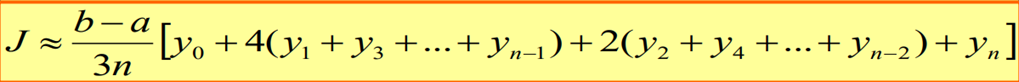

In [33]:
# обертка для метода симпсона для лучшей читаемости кода
def estimate_integral(f, a, b, n):
    return simpson_rule(f, a, b, n)

In [34]:
# вычисление погрешности по методу Рунге
def runge_estimate(f, a, b, n, m):
    integral_n = estimate_integral(f, a, b, n)
    integral_2n = estimate_integral(f, a, b, n * 2)
    
    runge_error = abs(integral_2n - integral_n) / 15
    return integral_2n, runge_error


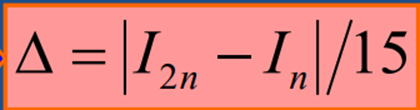

In [35]:
# метод Рунге
def integrate_with_runge(f, a, b, target_error):
    n = 2 # Начальное количество интервалов
    
    while True:
        # возвращает приближенное значение интеграла и оценку погрешности в этом интеграле по методу рунге
        integral, runge_error = runge_estimate(f, a, b, n, 2)
        if runge_error < target_error:
            return integral, runge_error, n
        n *= 2  # Удваиваем количество интервалов

In [36]:
# вычисляю для функции sin(x)
def sample_function(x):
    return (sin(x))/x

In [37]:
# задаю нижнюю границу ингерирования
a = 0.001
# задаю верхнюю границу ингерования
b = 11
# задаю максимально допустимую погрешность
target_error = 0.0000001

In [38]:
result, runge_error, num_intervals = integrate_with_runge(sample_function, a, b, target_error)

In [39]:
end = time.time() - start

In [40]:
print("Приближенное значение интеграла:", result)
print("Вычисленная погрешность по методу Рунге:", runge_error)
print("Число интервалов:", num_intervals)
# время работы в секундах:
print("Время работы алгоритма:", end) 

Приближенное значение интеграла: 1.577306799429077
Вычисленная погрешность по методу Рунге: 7.604540345577486e-09
Число интервалов: 64
Время работы алгоритма: 0.13456511497497559


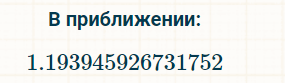